# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_3m_0f_240214_4"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [70, 1850]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,1128.355016,135.134225,1129.559456,135.749677,NaN,1128.355016,135.134225,NaN,1128.355016,135.134225,1.339620,18402.0,261.256200,98.072387,0.926868,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,71.180153,236.658206,71.589759,237.546302,0.0,91.000000,168.000000,0.270588,85.000000,172.000000,0.287622,5240.0,140.177830,50.621343,0.932518,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,141.091814,444.704373,142.252499,446.915884,NaN,141.091814,444.704373,NaN,141.091814,444.704373,-0.349721,7134.0,164.611834,61.709658,0.927073,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
158037,0,161997,225.131498,195.712538,220.446015,193.913295,NaN,383.645945,195.718647,NaN,225.131498,195.712538,1.308971,327.0,201.253084,111.692517,0.831860,3,3.0,0.000000,0.000000,0.0,False,False,False
158038,1,161997,1544.560346,753.756282,1543.091295,754.555978,NaN,1544.560346,753.756282,NaN,1544.560346,753.756282,1.000707,7283.0,165.744176,88.917425,0.843917,3,3.0,0.000000,0.000000,0.0,False,False,False
158039,2,161997,325.521006,272.185122,328.309798,270.435728,0.0,333.291154,261.988059,0.556863,317.568359,275.080900,-0.843848,12429.0,234.084802,74.676960,0.947749,3,3.0,-0.009722,0.008582,0.0,False,False,False


## Swapping mixed IDs

In [6]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 36000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 59616, velocity_threshold, omega_threshold, True],
    [60000, 70000, velocity_threshold, omega_threshold, True],
    [70000, 80000, velocity_threshold, omega_threshold, True],
    [80000, 90000, velocity_threshold, omega_threshold, True],
    [90000, 100000, velocity_threshold, omega_threshold, True],
    [100000, 110000, velocity_threshold, omega_threshold, True],
    [110000, 120000, velocity_threshold, omega_threshold, True],
    [120000, 130000, velocity_threshold, omega_threshold, True],
    [130000, 140000, velocity_threshold, omega_threshold, True],
    [140000, 150000, velocity_threshold, omega_threshold, True],
    [150000, 162000, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|███████████████████████| 16/16 [00:39<00:00,  2.46s/it]


Time: 120000 Chunks 2 Allowed time 120000 Permutation [0 1 2]
Time: 150000 Chunks 2 Allowed time 150000 Permutation [0 1 2]
Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]
Time: 90000 Chunks 2 Allowed time 90000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,1128.355016,135.134225,1129.559456,135.749677,NaN,1128.355016,135.134225,NaN,1128.355016,135.134225,1.339620,1.339620,18402.0,261.256200,98.072387,0.926868,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,71.180153,236.658206,71.589759,237.546302,0.0,91.000000,168.000000,0.270588,85.000000,172.000000,0.287622,0.287622,5240.0,140.177830,50.621343,0.932518,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,141.091814,444.704373,142.252499,446.915884,NaN,141.091814,444.704373,NaN,141.091814,444.704373,-0.349721,-0.349721,7134.0,164.611834,61.709658,0.927073,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,1129.018491,135.522993,1130.406676,136.268184,NaN,1129.018491,135.522993,NaN,1129.018491,135.522993,1.338298,1.338298,18658.0,261.552924,98.271022,0.926733,3,3.0,0.221158,0.129589,-0.000441,False,False,False
4,True,3,chunk_00000_10000,1,1,71.136320,236.858151,71.556399,237.765684,0.0,81.000000,169.000000,0.262745,90.000000,172.000000,-0.286899,-0.286899,5245.0,139.971936,50.771906,0.931895,3,3.0,-0.014611,0.066648,0.000241,False,False,False
5,True,3,chunk_00000_10000,2,2,141.033872,444.308222,142.180944,446.076880,NaN,141.033872,444.308222,NaN,141.033872,444.308222,-0.361507,-0.361507,7115.0,163.056815,60.909388,0.927611,3,3.0,-0.019314,-0.132050,-0.003929,False,False,False
6,True,6,chunk_00000_10000,0,0,1129.077903,135.588657,1130.470554,136.354796,NaN,1129.077903,135.588657,NaN,1129.077903,135.588657,1.338226,1.338226,18690.0,261.570746,98.320204,0.926667,3,3.0,0.019804,0.021888,-0.000024,False,False,False
7,True,6,chunk_00000_10000,1,1,71.132445,236.896670,71.554051,237.789013,0.0,81.000000,169.000000,0.262745,93.000000,172.000000,-0.287353,-0.287353,5255.0,139.821108,50.822937,0.931600,3,3.0,-0.001292,0.012840,-0.000151,False,False,False


In [7]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
158034,True,161994,chunk_150000_162000,0,1,225.131498,195.712538,220.446015,193.913295,NaN,383.645945,195.718647,NaN,225.131498,195.712538,1.308971,-1.308971,327.0,201.253084,111.692517,0.831860,3,3.0,0.000000,0.000000,0.0,False,False,False
158035,True,161994,chunk_150000_162000,1,2,1544.560346,753.756282,1543.091295,754.555978,NaN,1544.560346,753.756282,NaN,1544.560346,753.756282,1.000707,-1.000707,7283.0,165.744176,88.917425,0.843917,3,3.0,0.000000,0.000000,0.0,False,False,False
158039,True,161997,chunk_150000_162000,2,0,325.521006,272.185122,328.309798,270.435728,0.0,333.291154,261.988059,0.556863,317.568359,275.080900,-0.843848,-0.843848,12429.0,234.084802,74.676960,0.947749,3,3.0,-0.009722,0.008582,0.0,False,False,False
158037,True,161997,chunk_150000_162000,0,1,225.131498,195.712538,220.446015,193.913295,NaN,383.645945,195.718647,NaN,225.131498,195.712538,1.308971,-1.308971,327.0,201.253084,111.692517,0.831860,3,3.0,0.000000,0.000000,0.0,False,False,False
158038,True,161997,chunk_150000_162000,1,2,1544.560346,753.756282,1543.091295,754.555978,NaN,1544.560346,753.756282,NaN,1544.560346,753.756282,1.000707,-1.000707,7283.0,165.744176,88.917425,0.843917,3,3.0,0.000000,0.000000,0.0,False,False,False


## Interpolation over not allowed frames

In [8]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [9]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 8.729026470747018 
	- Angle: 4.625118500947652 



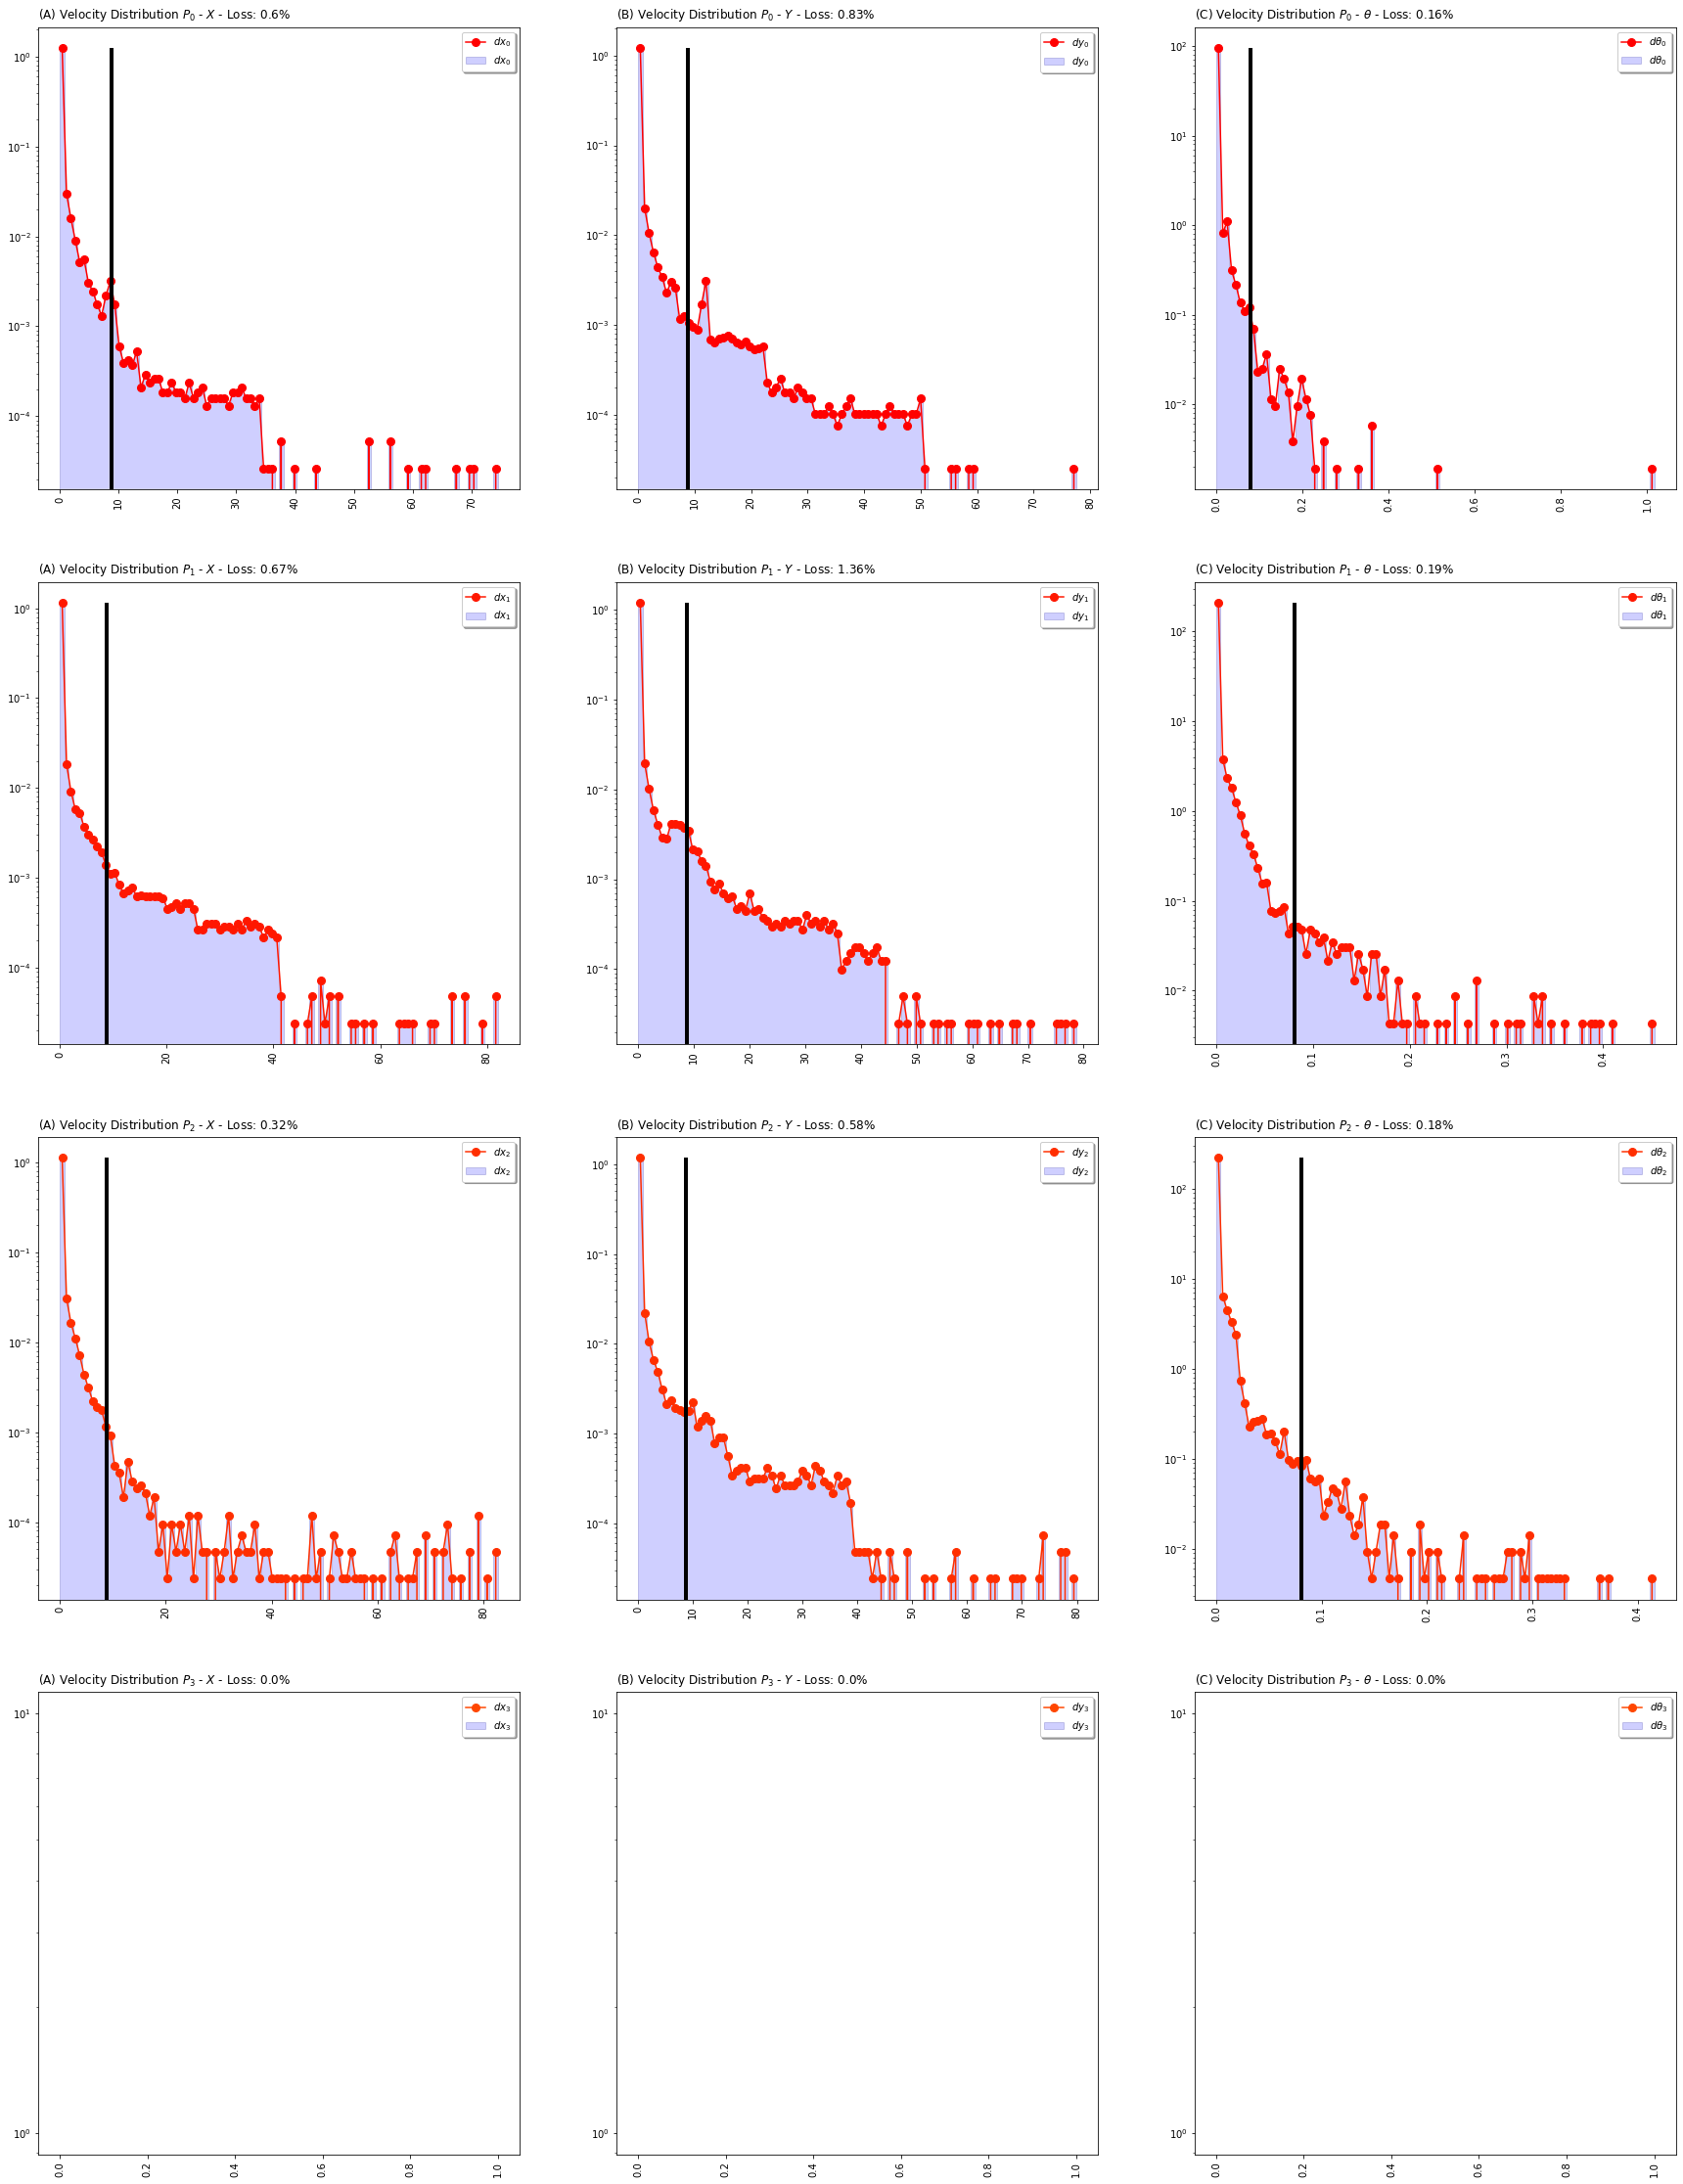

In [10]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


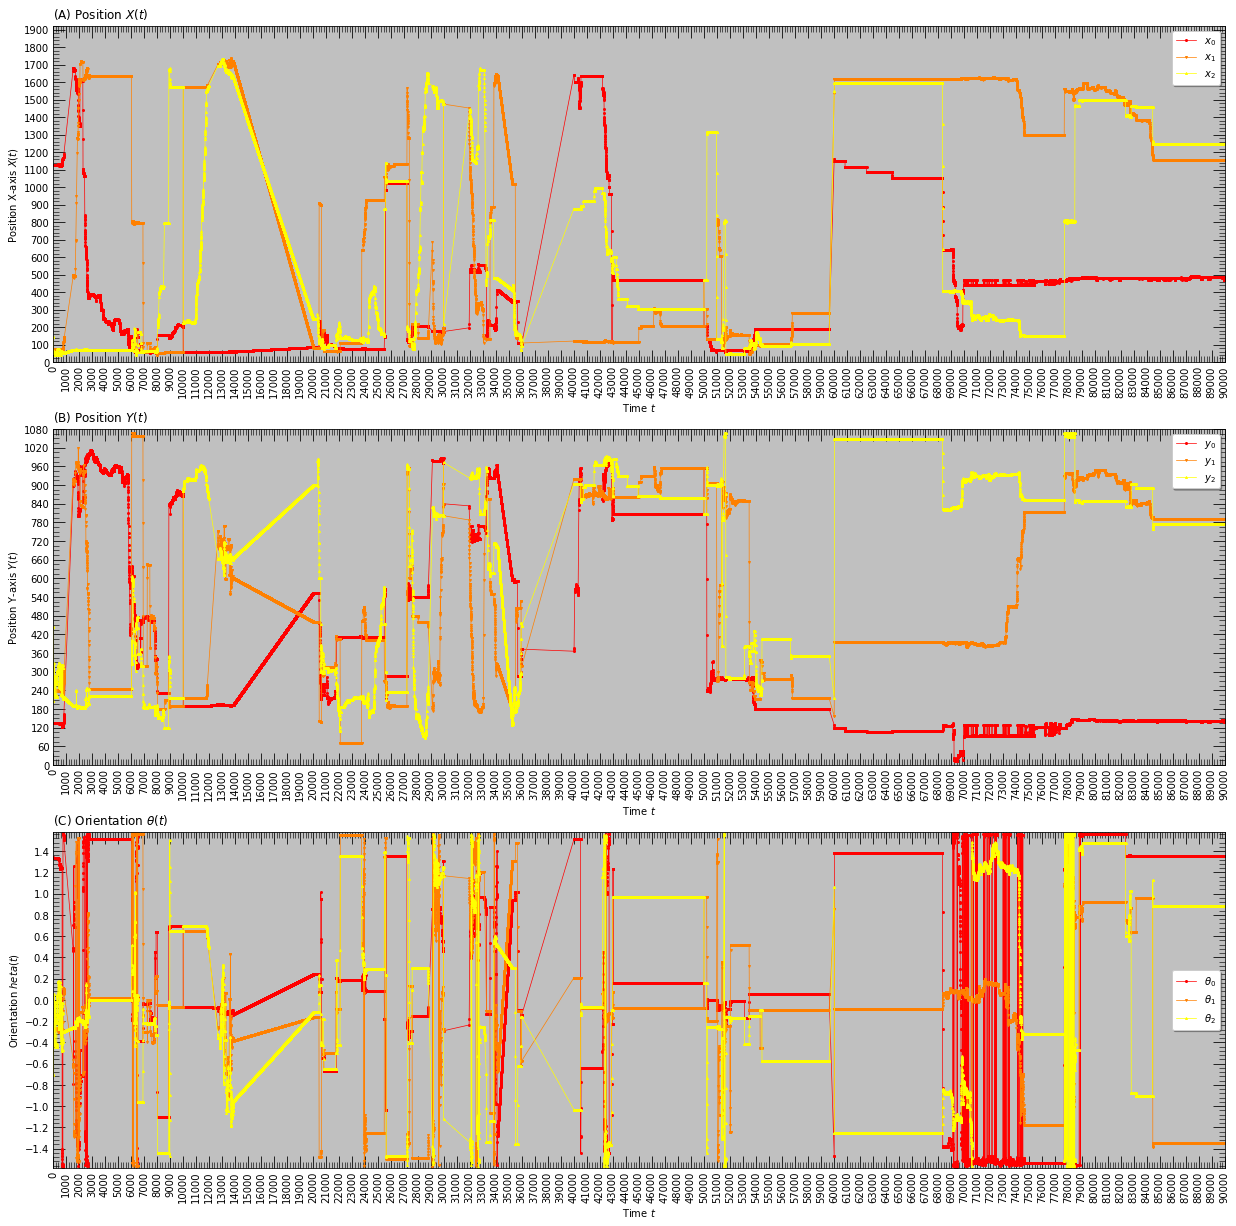

Corrected Orientation


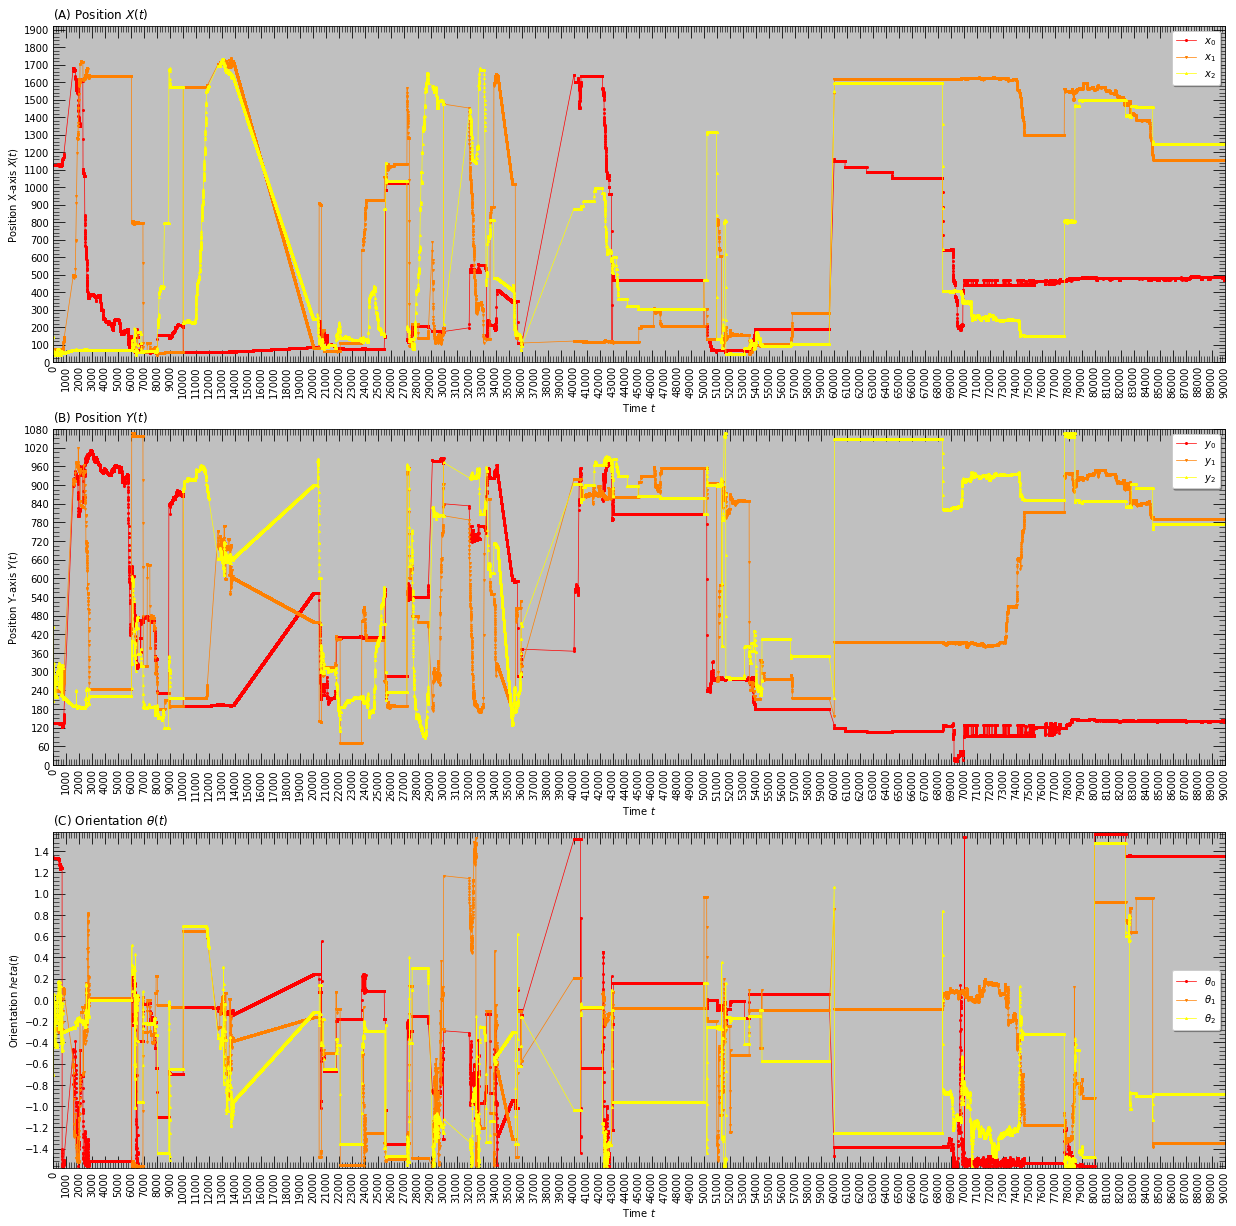

In [11]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )